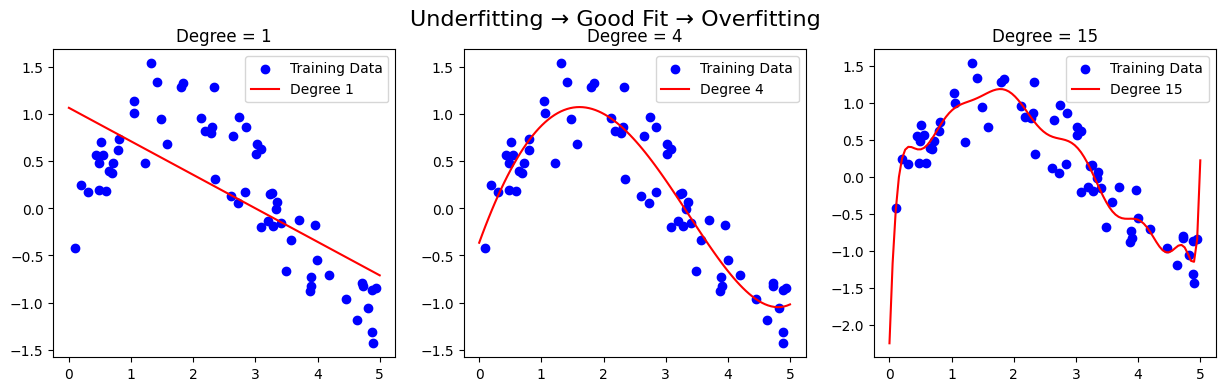

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


# Step 1: Generate sample data (non-linear)
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(80) * 0.3  # True pattern + noise


# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 2: Try 3 different model complexities
degrees = [1, 4, 15]
plt.figure(figsize=(15, 4))


for i, degree in enumerate(degrees):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_train)


    # Train linear regression model
    model = LinearRegression()
    model.fit(X_poly, y_train)

    # Predict
    X_plot = np.linspace(0, 5, 100).reshape(-1, 1)
    y_plot = model.predict(poly.transform(X_plot))

    # Plot
    plt.subplot(1, 3, i+1)
    plt.scatter(X_train, y_train, color='blue', label='Training Data')
    plt.plot(X_plot, y_plot, color='red', label=f'Degree {degree}')
    plt.title(f"Degree = {degree}")
    plt.legend()


plt.suptitle("Underfitting → Good Fit → Overfitting", fontsize=16)
plt.show()

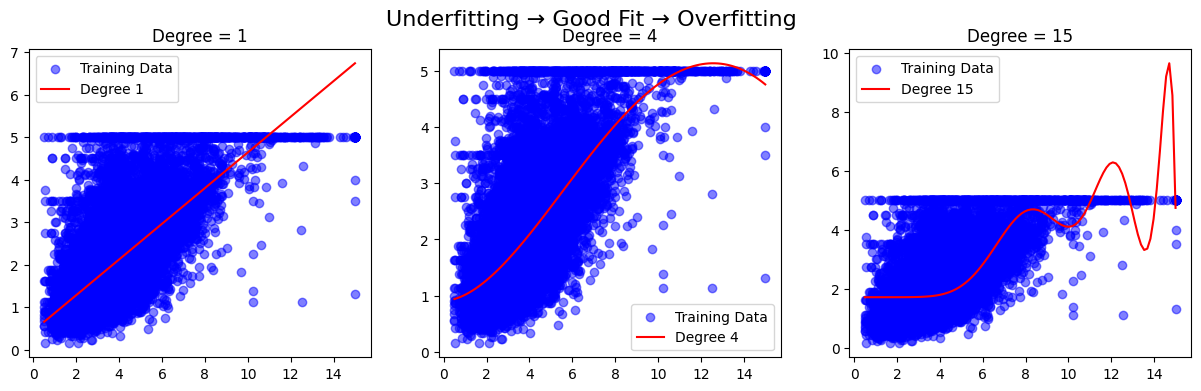

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

# Step 1: Load dataset
data = fetch_california_housing()
X = data.data[:, 0].reshape(-1, 1)  # Take first feature (MedInc) for simplicity
y = data.target

# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Try 3 different model complexities
degrees = [1, 4, 15]
plt.figure(figsize=(15, 4))

for i, degree in enumerate(degrees):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_train)

    # Train linear regression model
    model = LinearRegression()
    model.fit(X_poly, y_train)

    # Predict
    X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_plot = model.predict(poly.transform(X_plot))

    # Plot
    plt.subplot(1, 3, i+1)
    plt.scatter(X_train, y_train, color='blue', label='Training Data', alpha=0.5)
    plt.plot(X_plot, y_plot, color='red', label=f'Degree {degree}')
    plt.title(f"Degree = {degree}")
    plt.legend()

plt.suptitle("Underfitting → Good Fit → Overfitting", fontsize=16)
plt.show()

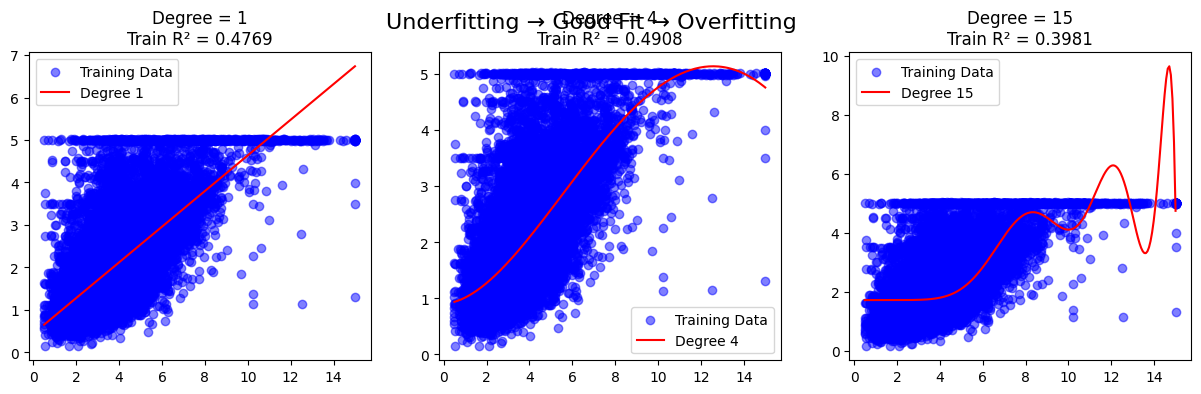

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

# Step 1: Load dataset
data = fetch_california_housing()
X = data.data[:, 0].reshape(-1, 1)  # Use first feature (MedInc)
y = data.target

# Add tiny noise to mimic "realistic" small variations
np.random.seed(0)
y_noisy = y + np.random.randn(*y.shape) * 0.01  # Very small noise

# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y_noisy, test_size=0.2, random_state=42)

# Step 2: Try 3 different model complexities
degrees = [1, 4, 15]
plt.figure(figsize=(15, 4))

for i, degree in enumerate(degrees):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_train)

    # Train linear regression model
    model = LinearRegression()
    model.fit(X_poly, y_train)

    # Predict
    X_plot = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
    y_plot = model.predict(poly.transform(X_plot))

    # Plot
    plt.subplot(1, 3, i+1)
    plt.scatter(X_train, y_train, color='blue', label='Training Data', alpha=0.5)
    plt.plot(X_plot, y_plot, color='red', label=f'Degree {degree}')
    plt.title(f"Degree = {degree}\nTrain R² = {model.score(X_poly, y_train):.4f}")
    plt.legend()

plt.suptitle("Underfitting → Good Fit → Overfitting", fontsize=16)
plt.show()

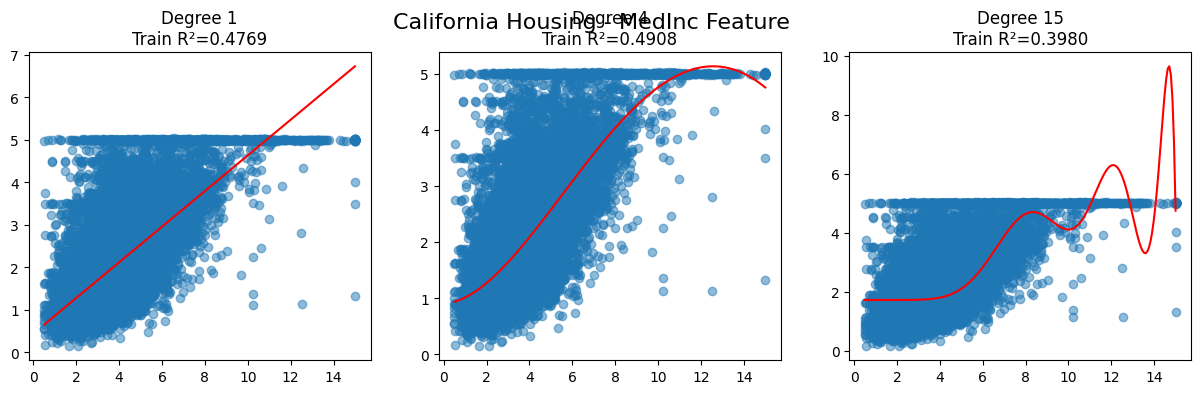

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

# Load dataset
data = fetch_california_housing()
X = data.data[:, 0].reshape(-1, 1)  # MedInc
y = data.target + np.random.randn(*data.target.shape) * 0.01  # Tiny noise

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Degrees
degrees = [1, 4, 15]
plt.figure(figsize=(15,4))

for i, degree in enumerate(degrees):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_train)

    model = LinearRegression()
    model.fit(X_poly, y_train)

    X_plot = np.linspace(X.min(), X.max(), 200).reshape(-1,1)
    y_plot = model.predict(poly.transform(X_plot))

    plt.subplot(1,3,i+1)
    plt.scatter(X_train, y_train, alpha=0.5)
    plt.plot(X_plot, y_plot, color='red')
    plt.title(f"Degree {degree}\nTrain R²={model.score(X_poly, y_train):.4f}")

plt.suptitle("California Housing - MedInc Feature", fontsize=16)
plt.show()

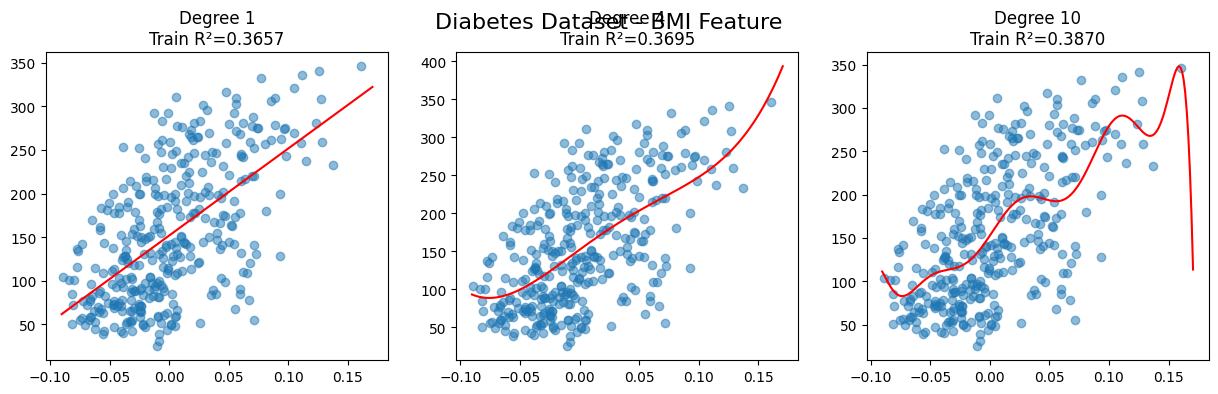

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

# Load dataset
data = load_diabetes()
X = data.data[:, 2].reshape(-1,1)  # BMI
y = data.target + np.random.randn(*data.target.shape) * 0.01  # tiny noise

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Degrees
degrees = [1, 4, 10]
plt.figure(figsize=(15,4))

for i, degree in enumerate(degrees):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_train)

    model = LinearRegression()
    model.fit(X_poly, y_train)

    X_plot = np.linspace(X.min(), X.max(), 200).reshape(-1,1)
    y_plot = model.predict(poly.transform(X_plot))

    plt.subplot(1,3,i+1)
    plt.scatter(X_train, y_train, alpha=0.5)
    plt.plot(X_plot, y_plot, color='red')
    plt.title(f"Degree {degree}\nTrain R²={model.score(X_poly, y_train):.4f}")

plt.suptitle("Diabetes Dataset - BMI Feature", fontsize=16)
plt.show()


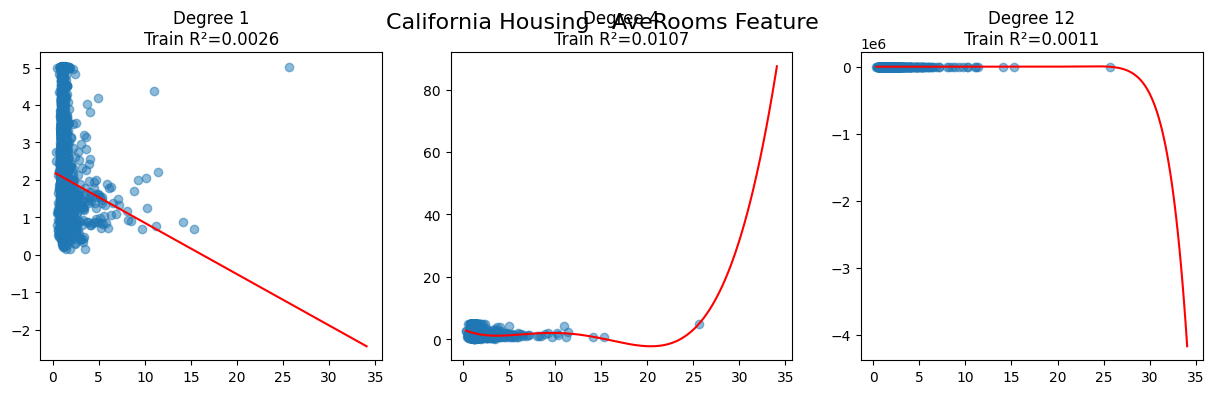

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

# Load dataset
data = fetch_california_housing()
X = data.data[:, 3].reshape(-1,1)  # AveRooms
y = data.target + np.random.randn(*data.target.shape) * 0.01  # tiny noise

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Degrees
degrees = [1, 4, 12]
plt.figure(figsize=(15,4))

for i, degree in enumerate(degrees):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_train)

    model = LinearRegression()
    model.fit(X_poly, y_train)

    X_plot = np.linspace(X.min(), X.max(), 200).reshape(-1,1)
    y_plot = model.predict(poly.transform(X_plot))

    plt.subplot(1,3,i+1)
    plt.scatter(X_train, y_train, alpha=0.5)
    plt.plot(X_plot, y_plot, color='red')
    plt.title(f"Degree {degree}\nTrain R²={model.score(X_poly, y_train):.4f}")

plt.suptitle("California Housing - AveRooms Feature", fontsize=16)
plt.show()


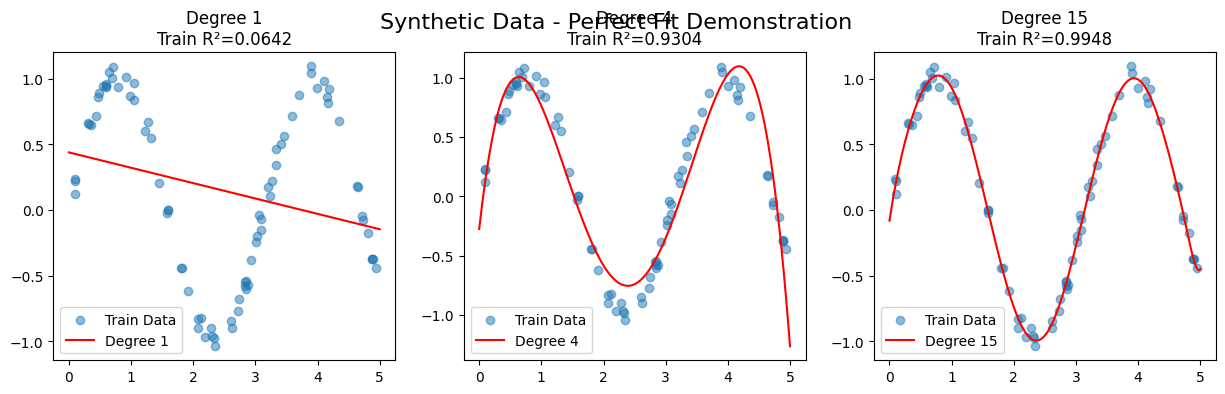

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Generate synthetic non-linear data
np.random.seed(0)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(2 * X).ravel() + np.random.randn(100) * 0.05  # tiny noise for near-perfect fit

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial degrees
degrees = [1, 4, 15]  # underfit → good → overfit
plt.figure(figsize=(15,4))

for i, degree in enumerate(degrees):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_train)

    model = LinearRegression()
    model.fit(X_poly, y_train)

    X_plot = np.linspace(0, 5, 200).reshape(-1,1)
    y_plot = model.predict(poly.transform(X_plot))

    plt.subplot(1,3,i+1)
    plt.scatter(X_train, y_train, alpha=0.5, label='Train Data')
    plt.plot(X_plot, y_plot, color='red', label=f'Degree {degree}')
    plt.title(f"Degree {degree}\nTrain R²={model.score(X_poly, y_train):.4f}")
    plt.legend()

plt.suptitle("Synthetic Data - Perfect Fit Demonstration", fontsize=16)
plt.show()